In [1487]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

def visualize_hog(im, hog, cell_size, block_size):
    num_bins = 6
    max_len = 7  # control sum of segment lengths for visualized histogram bin of each block
    im_h, im_w = im.shape
    num_cell_h, num_cell_w = int(im_h / cell_size), int(im_w / cell_size)
    num_blocks_h, num_blocks_w = num_cell_h - block_size + 1, num_cell_w - block_size + 1
    histo_normalized = hog.reshape((num_blocks_h, num_blocks_w, block_size**2, num_bins))
    histo_normalized_vis = np.sum(histo_normalized**2, axis=2) * max_len  # num_blocks_h x num_blocks_w x num_bins
    angles = np.arange(0, np.pi, np.pi/num_bins)
    mesh_x, mesh_y = np.meshgrid(np.r_[cell_size: cell_size*num_cell_w: cell_size], np.r_[cell_size: cell_size*num_cell_h: cell_size])
    mesh_u = histo_normalized_vis * np.sin(angles).reshape((1, 1, num_bins))  # expand to same dims as histo_normalized
    mesh_v = histo_normalized_vis * -np.cos(angles).reshape((1, 1, num_bins))  # expand to same dims as histo_normalized
    plt.imshow(im, cmap='gray', vmin=0, vmax=1)
    for i in range(num_bins):
        plt.quiver(mesh_x - 0.5 * mesh_u[:, :, i], mesh_y - 0.5 * mesh_v[:, :, i], mesh_u[:, :, i], mesh_v[:, :, i],
                   color='white', headaxislength=0, headlength=0, scale_units='xy', scale=1, width=0.002, angles='xy')
    plt.show()

In [1488]:
im = cv2.imread(r'/Users/jooyong/github_locals/computer_vision/hw1/template.png', 0)

In [1489]:
# normalize float format image
im_norm = (im-np.min(im))/(np.max(im)-np.min(im))

In [1490]:
im.shape

(50, 50)

In [1491]:
length = im.shape[0]
width = im.shape[1]

In [1492]:
# zero padding
pads = np.zeros((length+2, width+2))
pads[1:length+1,1:width+1] = im_norm
padded_im = pads

In [1493]:
diff_along_y = im_norm.copy()

for row in range(im.shape[0]):
    for column in range(im.shape[1]):
        three_by_three = padded_im[row:row+3, column:column+3]
        current_p = three_by_three[1, 1]
        next_p = three_by_three[2, 1]

        change = next_p - current_p

        diff_along_y[row, column] = change

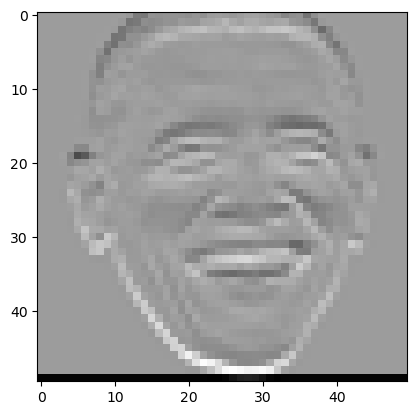

In [1494]:
plt.imshow(diff_along_y, cmap='gray')

In [1495]:
diff_along_x = im_norm.copy()

for row in range(im.shape[0]):
    for column in range(im.shape[1]):
        three_by_three = padded_im[row:row+3, column:column+3]
        current_p = three_by_three[1, 1]
        next_p = three_by_three[1, 2]

        change = next_p - current_p

        diff_along_x[row, column] = change

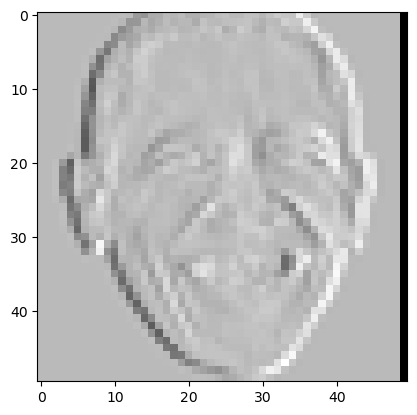

In [1496]:
plt.imshow(diff_along_x, cmap='gray')

In [1497]:
diff_along_x

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.97177419],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.97177419],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.97177419],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.97177419],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.97177419],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.97177419]])

In [1498]:
grad_mag = (diff_along_x**2+diff_along_y**2)**(1/2)
grad_angle = np.arctan((diff_along_y/(diff_along_x+0.0000001)))*(180/np.pi)

In [1499]:
for i in range(grad_angle.shape[0]):
    for j in range(grad_angle.shape[1]):
        
        if grad_angle[i][j]<0:
            grad_angle[i][j] += 180

In [1500]:
grad_angle

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.        ],
       [90.0000059 , 90.0000059 , 90.0000059 , ..., 90.0000059 ,
        90.0000059 , 45.00000295]])

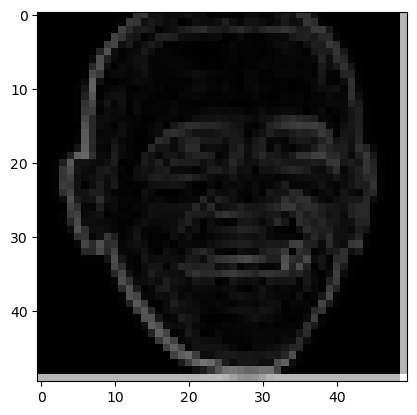

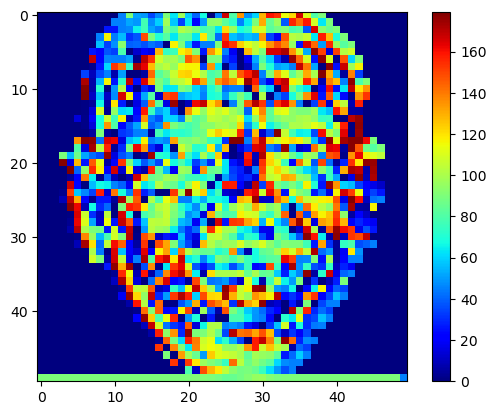

In [1501]:
plt.imshow(grad_mag, cmap='gray')
plt.show()
plt.imshow(grad_angle, cmap='jet')
plt.colorbar()
plt.show()

In [1502]:
one_length_cell_size = 3

ori_histo = np.zeros((6, int(grad_angle.shape[0]/one_length_cell_size),\
                      int(grad_angle.shape[1]/one_length_cell_size)))

for start_point_y in range(int(grad_angle.shape[0]/one_length_cell_size)):
    for start_point_x in range(int(grad_angle.shape[1]/one_length_cell_size)):
        
       one_cell_angle = grad_angle[start_point_y*one_length_cell_size:\
                            start_point_y*one_length_cell_size+one_length_cell_size, \
                            start_point_x*one_length_cell_size:\
                            start_point_x*one_length_cell_size+one_length_cell_size]
       
       one_cell_mag = grad_mag[start_point_y*one_length_cell_size:\
                            start_point_y*one_length_cell_size+one_length_cell_size, \
                            start_point_x*one_length_cell_size:\
                            start_point_x*one_length_cell_size+one_length_cell_size]

       bin_1 = 0
       bin_2 = 0
       bin_3 = 0
       bin_4 = 0
       bin_5 = 0
       bin_6 = 0

              
       for mag, angle in zip(one_cell_mag.flatten(), one_cell_angle.flatten()):
              
              
              if (0<=angle and angle<15) or (165<=angle and angle<180):
                     bin_1+=mag
              elif 15<=angle and angle<45:
                     bin_2+=mag
              elif 45<=angle and angle<75:
                     bin_3+=mag
              elif 75<=angle and angle<105:
                     bin_4+=mag
              elif 105<=angle and angle<135:
                     bin_5+=mag
              elif 135<=angle and angle<165:
                     bin_6+=mag
                       
       
       bins = [bin_1, bin_2, bin_3, bin_4, bin_5, bin_6]
       
       for num_bin in range(6):   
              
              ori_histo[num_bin, start_point_y, start_point_x]=bins[num_bin]


In [1503]:
block_size = 2

ori_histo_normalized = np.zeros((6*block_size**2, ori_histo.shape[1]-block_size+1, ori_histo.shape[2]-block_size+1))

for start_point_y in range(ori_histo.shape[1]-block_size+1):
    for start_point_x in range(ori_histo.shape[2]-block_size+1):
        
        one_block = ori_histo[:, start_point_y:start_point_y+block_size,\
                              start_point_x:start_point_x+block_size]
        
             
        denominator = np.sqrt((one_block.flatten()**2).sum()+0.0000001)

        concatenated_hog = one_block.flatten()/denominator


        for num_bin in range(len(concatenated_hog)):   
                
                ori_histo_normalized[num_bin, start_point_y, start_point_x]=concatenated_hog[num_bin]
        
        

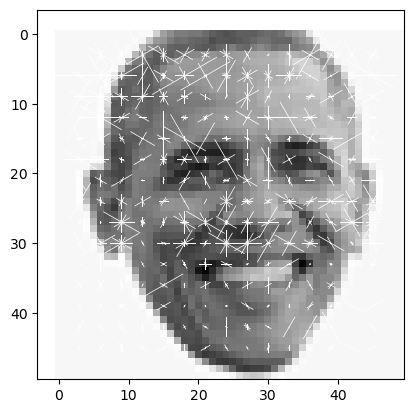

In [1504]:
im = im.astype('float') / 255.0
visualize_hog(im, ori_histo_normalized, one_length_cell_size, block_size=2)

In [1505]:
np.array([[1], [2], [3]])/3

array([[0.33333333],
       [0.66666667],
       [1.        ]])